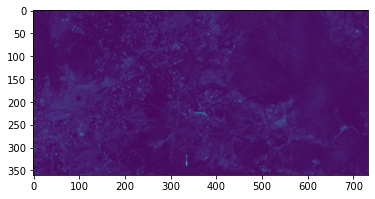

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 733,
 'height': 360,
 'count': 1,
 'crs': CRS.from_epsg(3857),
 'transform': Affine(10.010852272000982, 0.0, 8243400.0437870985,
        0.0, -10.00581932760995, 1715018.1919427773)}

In [12]:
import rasterio as rio
from rasterio.plot import show
import numpy as np

img = rio.open('D:\\python_data\\sentinel_image\\2022-03-05-00_00_2022-03-05-23_59_Sentinel-2_L2A_B02_(Raw).tiff')
image = img.read()
show(image)
img.meta

In [9]:
# code for mulitiple bands convert in to one image
file_list = ['D:\\python_data\\sentinel_image\\2022-03-05-00_00_2022-03-05-23_59_Sentinel-2_L2A_B04_(Raw).tiff','D:\\python_data\\sentinel_image\\2022-03-05-00_00_2022-03-05-23_59_Sentinel-2_L2A_B03_(Raw).tiff','D:\\python_data\\sentinel_image\\2022-03-05-00_00_2022-03-05-23_59_Sentinel-2_L2A_B02_(Raw).tiff']
with rio.open(file_list[0]) as file:
    meta = file.meta
    
meta.update(count= len(file_list))
with rio.open('D:\\python_data\\sentinel_image\\stack_RGB .tiff','w', **meta) as df:
    for id, layer in enumerate(file_list, start = 1):
        with rio.open(layer) as file1:
            df.write_band(id, file1.read(1))
    

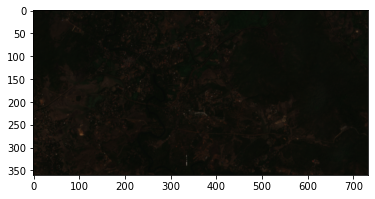

<AxesSubplot:>

In [24]:
import rasterio as rio
from rasterio.plot import show
import numpy as np

img = rio.open('D:\\python_data\\sentinel_image\\stack_RGB .tiff')
image = img.read()
show(image)


In [11]:
img.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 733,
 'height': 360,
 'count': 3,
 'crs': CRS.from_epsg(3857),
 'transform': Affine(10.010852272000982, 0.0, 8243400.0437870985,
        0.0, -10.00581932760995, 1715018.1919427773)}

In [5]:
import rasterio as rio

b4 = rio.open('D:\\python_data\\sentinel_image\\2022-03-05-00_00_2022-03-05-23_59_Sentinel-2_L2A_B04_(Raw).tiff')
b5 = rio.open('D:\\python_data\\sentinel_image\\2022-03-05-00_00_2022-03-05-23_59_Sentinel-2_L2A_B05_(Raw).tiff')
red = b4.read().astype(float)
nir = b5.read().astype(float)
ndvi = (nir - red)/(nir+ red)

meta = b4.meta
meta.update(driver= 'GTiff')
meta.update(dtype = rio.float32)
with rio.open('D:\\python_data\\sentinel_image\\NDVI.tiff', "w", **meta) as df:
    df.write(ndvi.astype(rio.float32))
    



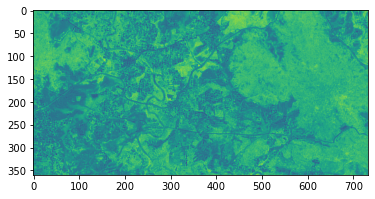

<AxesSubplot:>

In [11]:
from rasterio.plot import show
img = rio.open('D:\\python_data\\sentinel_image\\NDVI.tiff')
image = img.read()
show(image)

In [12]:
img.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 733,
 'height': 360,
 'count': 1,
 'crs': CRS.from_epsg(3857),
 'transform': Affine(10.010852272000982, 0.0, 8243400.0437870985,
        0.0, -10.00581932760995, 1715018.1919427773)}